# --- Day 16: Reindeer Maze ---
It's time again for the Reindeer Olympics! This year, the big event is the Reindeer Maze, where the Reindeer compete for the lowest score.

You and The Historians arrive to search for the Chief right as the event is about to start. It wouldn't hurt to watch a little, right?

The Reindeer start on the Start Tile (marked S) facing East and need to reach the End Tile (marked E). They can move forward one tile at a time (increasing their score by 1 point), but never into a wall (#). They can also rotate clockwise or counterclockwise 90 degrees at a time (increasing their score by 1000 points).

To figure out the best place to sit, you start by grabbing a map (your puzzle input) from a nearby kiosk. For example:
```
###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############
```
There are many paths through this maze, but taking any of the best paths would incur a score of only 7036. This can be achieved by taking a total of 36 steps forward and turning 90 degrees a total of 7 times:

```
###############
#.......#....E#
#.#.###.#.###^#
#.....#.#...#^#
#.###.#####.#^#
#.#.#.......#^#
#.#.#####.###^#
#..>>>>>>>>v#^#
###^#.#####v#^#
#>>^#.....#v#^#
#^#.#.###.#v#^#
#^....#...#v#^#
#^###.#.#.#v#^#
#S..#.....#>>^#
###############
```
Here's a second example:
```
#################
#...#...#...#..E#
#.#.#.#.#.#.#.#.#
#.#.#.#...#...#.#
#.#.#.#.###.#.#.#
#...#.#.#.....#.#
#.#.#.#.#.#####.#
#.#...#.#.#.....#
#.#.#####.#.###.#
#.#.#.......#...#
#.#.###.#####.###
#.#.#...#.....#.#
#.#.#.#####.###.#
#.#.#.........#.#
#.#.#.#########.#
#S#.............#
#################
```
In this maze, the best paths cost 11048 points; following one such path would look like this:
```
#################
#...#...#...#..E#
#.#.#.#.#.#.#.#^#
#.#.#.#...#...#^#
#.#.#.#.###.#.#^#
#>>v#.#.#.....#^#
#^#v#.#.#.#####^#
#^#v..#.#.#>>>>^#
#^#v#####.#^###.#
#^#v#..>>>>^#...#
#^#v###^#####.###
#^#v#>>^#.....#.#
#^#v#^#####.###.#
#^#v#^........#.#
#^#v#^#########.#
#S#>>^..........#
#################
```
Note that the path shown above includes one 90 degree turn as the very first move, rotating the Reindeer from facing East to facing North.

Analyze your map carefully. What is the lowest score a Reindeer could possibly get?

In [ ]:
from fastcore.utils import L
from aocd import get_data

inp = get_data(day=16, year=2024)

samp = """###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############"""
print(samp)

###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############


In [ ]:
samp2 = '''#################
#...#...#...#..E#
#.#.#.#.#.#.#.#.#
#.#.#.#...#...#.#
#.#.#.#.###.#.#.#
#...#.#.#.....#.#
#.#.#.#.#.#####.#
#.#...#.#.#.....#
#.#.#####.#.###.#
#.#.#.......#...#
#.#.###.#####.###
#.#.#...#.....#.#
#.#.#.#####.###.#
#.#.#.........#.#
#.#.#.#########.#
#S#.............#
#################'''
print(samp2)

#################
#...#...#...#..E#
#.#.#.#.#.#.#.#.#
#.#.#.#...#...#.#
#.#.#.#.###.#.#.#
#...#.#.#.....#.#
#.#.#.#.#.#####.#
#.#...#.#.#.....#
#.#.#####.#.###.#
#.#.#.......#...#
#.#.###.#####.###
#.#.#...#.....#.#
#.#.#.#####.###.#
#.#.#.........#.#
#.#.#.#########.#
#S#.............#
#################


Here's my idea:
- Let's represent the maze as a directed graph.
- Each tile in the maze will be represented as four nodes, one for each direction. Rotating clockwise and counterclockwise will be represented as an edges with weight of 1000.
- The neighboring tiles will be connected with an edge with weith of 1.

What do you think?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That's an excellent approach! Modeling the maze as a graph where each (position, direction) pair is a node is exactly right. This captures the state perfectly since the cost depends on which way you're facing.

Once you have that graph, you can use Dijkstra's algorithm to find the shortest path from (S, East) to E (any direction).

Want to start by parsing the maze and finding S and E positions?

Let's parse the maze into NumPy array. I'd like to keep the tiles as chars.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠

```python
import numpy as np

maze = np.array([list(row) for row in samp.strip().split('\n')])
maze
```

This creates a 2D array of single characters. Try it out!

In [ ]:
import numpy as np

maze = np.array([list(row) for row in samp.strip().split('\n')])
print(maze)

[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '.' '.' '.' '.' '.' '.' '.' '#' '.' '.' '.' '.' 'E' '#']
 ['#' '.' '#' '.' '#' '#' '#' '.' '#' '.' '#' '#' '#' '.' '#']
 ['#' '.' '.' '.' '.' '.' '#' '.' '#' '.' '.' '.' '#' '.' '#']
 ['#' '.' '#' '#' '#' '.' '#' '#' '#' '#' '#' '.' '#' '.' '#']
 ['#' '.' '#' '.' '#' '.' '.' '.' '.' '.' '.' '.' '#' '.' '#']
 ['#' '.' '#' '.' '#' '#' '#' '#' '#' '.' '#' '#' '#' '.' '#']
 ['#' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '#' '.' '#']
 ['#' '#' '#' '.' '#' '.' '#' '#' '#' '#' '#' '.' '#' '.' '#']
 ['#' '.' '.' '.' '#' '.' '.' '.' '.' '.' '#' '.' '#' '.' '#']
 ['#' '.' '#' '.' '#' '.' '#' '#' '#' '.' '#' '.' '#' '.' '#']
 ['#' '.' '.' '.' '.' '.' '#' '.' '.' '.' '#' '.' '#' '.' '#']
 ['#' '.' '#' '#' '#' '.' '#' '.' '#' '.' '#' '.' '#' '.' '#']
 ['#' 'S' '.' '.' '#' '.' '.' '.' '.' '.' '#' '.' '.' '.' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']]


In [ ]:
def parse(inp):
    rs = inp.strip().split('\n')
    return np.array([list(r) for r in rs])
arr = parse(samp)
print(arr)

[['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '.' '.' '.' '.' '.' '.' '.' '#' '.' '.' '.' '.' 'E' '#']
 ['#' '.' '#' '.' '#' '#' '#' '.' '#' '.' '#' '#' '#' '.' '#']
 ['#' '.' '.' '.' '.' '.' '#' '.' '#' '.' '.' '.' '#' '.' '#']
 ['#' '.' '#' '#' '#' '.' '#' '#' '#' '#' '#' '.' '#' '.' '#']
 ['#' '.' '#' '.' '#' '.' '.' '.' '.' '.' '.' '.' '#' '.' '#']
 ['#' '.' '#' '.' '#' '#' '#' '#' '#' '.' '#' '#' '#' '.' '#']
 ['#' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '.' '#' '.' '#']
 ['#' '#' '#' '.' '#' '.' '#' '#' '#' '#' '#' '.' '#' '.' '#']
 ['#' '.' '.' '.' '#' '.' '.' '.' '.' '.' '#' '.' '#' '.' '#']
 ['#' '.' '#' '.' '#' '.' '#' '#' '#' '.' '#' '.' '#' '.' '#']
 ['#' '.' '.' '.' '.' '.' '#' '.' '.' '.' '#' '.' '#' '.' '#']
 ['#' '.' '#' '#' '#' '.' '#' '.' '#' '.' '#' '.' '#' '.' '#']
 ['#' 'S' '.' '.' '#' '.' '.' '.' '.' '.' '#' '.' '.' '.' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#' '#']]


Create a function visualizing arr using matplotlib. The walls should be black, free tiles should be white, 'S' green and 'E' red.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠

```python
import matplotlib.pyplot as plt

def viz(arr):
    colors = {'#': 0, '.': 1, 'S': 2, 'E': 3}
    cmap = plt.cm.colors.ListedColormap(['black', 'white', 'green', 'red'])
    img = np.vectorize(colors.get)(arr)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

viz(arr)
```

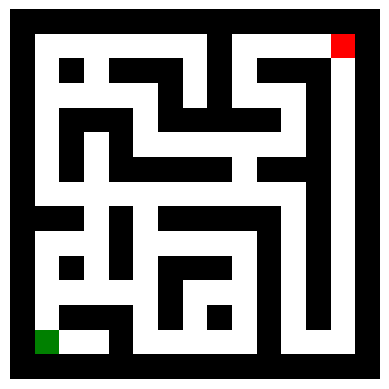

In [ ]:
import matplotlib.pyplot as plt

def viz(arr):
    colors = {'#': 0, '.': 1, 'S': 2, 'E': 3}
    cmap = plt.cm.colors.ListedColormap(['black', 'white', 'green', 'red'])
    img = np.vectorize(colors.get)(arr)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

viz(arr)

In [ ]:
np.vectorize?

Init signature:
np.vectorize(
    pyfunc=<no value>,
    otypes=None,
    doc=None,
    excluded=None,
    cache=False,
    signature=None,
)
Docstring:     
vectorize(pyfunc=np._NoValue, otypes=None, doc=None, excluded=None,
cache=False, signature=None)

Returns an object that acts like pyfunc, but takes arrays as input.

Define a vectorized function which takes a nested sequence of objects or
numpy arrays as inputs and returns a single numpy array or a tuple of numpy
arrays. The vectorized function evaluates `pyfunc` over successive tuples
of the input arrays like the python map function, except it uses the
broadcasting rules of numpy.

The data type of the output of `vectorized` is determined by calling
the function with the first element of the input.  This can be avoided
by specifying the `otypes` argument.

Parameters
----------
pyfunc : callable, optional
    A python function or method.
    Can be omitted to produce a decorator with keyword arguments.
otypes : str or list of dt

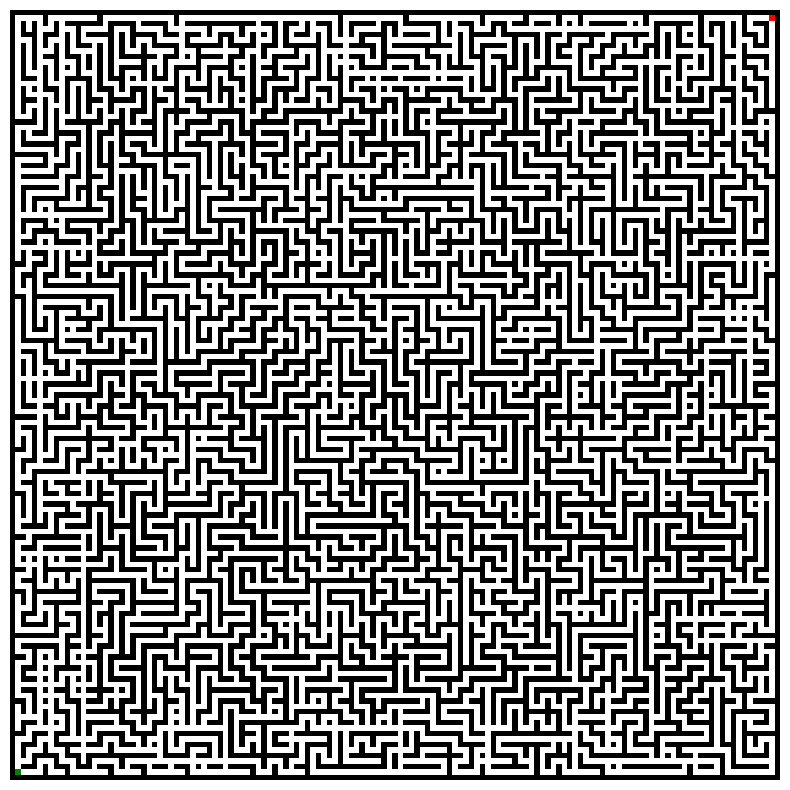

In [ ]:
plt.figure(figsize=(10, 10))
viz(parse(inp))

What shall I add next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Find the S and E positions. You can use `np.where()` or `np.argwhere()` to locate specific characters in the array.

In [ ]:
np.argwhere(arr=='S')[0], np.argwhere(arr=='E')[0]

(array([13,  1]), array([ 1, 13]))

What's next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Now define the four directions (e.g., as tuples for row/col deltas) and set up a way to map direction indices to their clockwise/counterclockwise neighbors. Something like:

```python
DIRS = [(0,1), (1,0), (0,-1), (-1,0)]  # E, S, W, N
```

Then you can build the graph. Would you like to use NetworkX or a simple dict-based adjacency list?

In [ ]:
DIRS = dict(E=(0,1), S=(1,0), W=(0,-1), N=(-1,0))  # E, S, W, N
DIRS['E']

(0, 1)

In [ ]:
ds = list(DIRS.keys())
ds

['E', 'S', 'W', 'N']

In [ ]:
rots = L(ds, ds[1:] + ds[:1]).zip()
rots += [(b, a) for a, b in rots]
rots

[('E', 'S'), ('S', 'W'), ('W', 'N'), ('N', 'E'), ('S', 'E'), ('W', 'S'), ('N', 'W'), ('E', 'N')]

In [ ]:
edges_rots = [((int(r), int(c), ds), (int(r), int(c), dt), 1000) 
         for r, c in np.argwhere(arr != '#')
         for ds, dt in rots]
edges_rots[:10]

[((1, 1, 'E'), (1, 1, 'S'), 1000),
 ((1, 1, 'S'), (1, 1, 'W'), 1000),
 ((1, 1, 'W'), (1, 1, 'N'), 1000),
 ((1, 1, 'N'), (1, 1, 'E'), 1000),
 ((1, 1, 'S'), (1, 1, 'E'), 1000),
 ((1, 1, 'W'), (1, 1, 'S'), 1000),
 ((1, 1, 'N'), (1, 1, 'W'), 1000),
 ((1, 1, 'E'), (1, 1, 'N'), 1000),
 ((1, 2, 'E'), (1, 2, 'S'), 1000),
 ((1, 2, 'S'), (1, 2, 'W'), 1000)]

In [ ]:
edges_moves = [((int(r), int(c), d), (int(r+dr), int(c+dc), d), 1)
               for r, c in np.argwhere(arr != '#')
               for d, (dr, dc) in DIRS.items()
               if arr[r+dr, c+dc] != '#']
edges_moves[:10]

[((1, 1, 'E'), (1, 2, 'E'), 1),
 ((1, 1, 'S'), (2, 1, 'S'), 1),
 ((1, 2, 'E'), (1, 3, 'E'), 1),
 ((1, 2, 'W'), (1, 1, 'W'), 1),
 ((1, 3, 'E'), (1, 4, 'E'), 1),
 ((1, 3, 'S'), (2, 3, 'S'), 1),
 ((1, 3, 'W'), (1, 2, 'W'), 1),
 ((1, 4, 'E'), (1, 5, 'E'), 1),
 ((1, 4, 'W'), (1, 3, 'W'), 1),
 ((1, 5, 'E'), (1, 6, 'E'), 1)]

Wrap the edge creation into a function

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠

```python
def make_edges(arr):
    ds = list(DIRS.keys())
    rots = L(ds, ds[1:] + ds[:1]).zip()
    rots += [(b, a) for a, b in rots]
    edges = [((int(r), int(c), d1), (int(r), int(c), d2), 1000) for r, c in np.argwhere(arr != '#') for d1, d2 in rots]
    edges += [((int(r), int(c), d), (int(r+dr), int(c+dc), d), 1) for r, c in np.argwhere(arr != '#') for d, (dr, dc) in DIRS.items() if arr[r+dr, c+dc] != '#']
    return edges

len(make_edges(arr))
```

In [ ]:
def make_edges(arr):
    ds = list(DIRS.keys())
    rots = L(ds, ds[1:] + ds[:1]).zip()
    rots += [(b, a) for a, b in rots]
    edges = [((int(r), int(c), d1), (int(r), int(c), d2), 1000) for r, c in np.argwhere(arr != '#') for d1, d2 in rots]
    edges += [((int(r), int(c), d), (int(r+dr), int(c+dc), d), 1) for r, c in np.argwhere(arr != '#') for d, (dr, dc) in DIRS.items() if arr[r+dr, c+dc] != '#']
    return edges

es = make_edges(arr)
es[:10]

[((1, 1, 'E'), (1, 1, 'S'), 1000),
 ((1, 1, 'S'), (1, 1, 'W'), 1000),
 ((1, 1, 'W'), (1, 1, 'N'), 1000),
 ((1, 1, 'N'), (1, 1, 'E'), 1000),
 ((1, 1, 'S'), (1, 1, 'E'), 1000),
 ((1, 1, 'W'), (1, 1, 'S'), 1000),
 ((1, 1, 'N'), (1, 1, 'W'), 1000),
 ((1, 1, 'E'), (1, 1, 'N'), 1000),
 ((1, 2, 'E'), (1, 2, 'S'), 1000),
 ((1, 2, 'S'), (1, 2, 'W'), 1000)]

Now, let's add the edges to directed networkx graph.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠

```python
import networkx as nx

G = nx.DiGraph()
G.add_weighted_edges_from(es)
len(G.nodes), len(G.edges)
```

In [ ]:
import networkx as nx

G = nx.DiGraph()
G.add_weighted_edges_from(es)
len(G.nodes), len(G.edges)

(416, 1052)

And now let's find the shortest path.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

```python
start = (13, 1, 'E')  # S position, facing East
end_pos = (1, 13)     # E position

# Find min cost to reach E in any direction
min_cost = min(nx.shortest_path_length(G, start, (*end_pos, d), weight='weight') 
               for d in DIRS if (*end_pos, d) in G)
min_cost
```

In [ ]:
start = np.argwhere(arr=='S')[0]
start = int(start[0]), int(start[1]), 'E'
start


(13, 1, 'E')

In [ ]:
end_pos = np.argwhere(arr=='E')[0]
end_pos = int(end_pos[0]), int(end_pos[1])
end_pos

(1, 13)

In [ ]:
# Find min cost to reach E in any direction
min_cost = min(nx.shortest_path_length(G, start, (*end_pos, d), weight='weight') 
               for d in DIRS if (*end_pos, d) in G)
min_cost

7036

Wrapt this into a solve function.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠

```python
def solve(inp):
    arr = parse(inp)
    G = nx.DiGraph()
    G.add_weighted_edges_from(make_edges(arr))
    start = tuple(int(x) for x in np.argwhere(arr=='S')[0]) + ('E',)
    end_pos = tuple(int(x) for x in np.argwhere(arr=='E')[0])
    return min(nx.shortest_path_length(G, start, (*end_pos, d), weight='weight') for d in DIRS if (*end_pos, d) in G)

solve(samp)
```

In [ ]:
def solve(inp):
    arr = parse(inp)
    G = nx.DiGraph()
    G.add_weighted_edges_from(make_edges(arr))
    start = tuple(int(x) for x in np.argwhere(arr=='S')[0]) + ('E',)
    end_pos = tuple(int(x) for x in np.argwhere(arr=='E')[0])
    return min(nx.shortest_path_length(G, start, (*end_pos, d), weight='weight') for d in DIRS if (*end_pos, d) in G)

solve(samp)

7036

In [ ]:
solve(samp2)

11048

In [ ]:
solve(inp)

89460

# --- Part Two ---
Now that you know what the best paths look like, you can figure out the best spot to sit.

Every non-wall tile (S, ., or E) is equipped with places to sit along the edges of the tile. While determining which of these tiles would be the best spot to sit depends on a whole bunch of factors (how comfortable the seats are, how far away the bathrooms are, whether there's a pillar blocking your view, etc.), the most important factor is whether the tile is on one of the best paths through the maze. If you sit somewhere else, you'd miss all the action!

So, you'll need to determine which tiles are part of any best path through the maze, including the S and E tiles.

In the first example, there are 45 tiles (marked O) that are part of at least one of the various best paths through the maze:
```
###############
#.......#....O#
#.#.###.#.###O#
#.....#.#...#O#
#.###.#####.#O#
#.#.#.......#O#
#.#.#####.###O#
#..OOOOOOOOO#O#
###O#O#####O#O#
#OOO#O....#O#O#
#O#O#O###.#O#O#
#OOOOO#...#O#O#
#O###.#.#.#O#O#
#O..#.....#OOO#
###############
```
In the second example, there are 64 tiles that are part of at least one of the best paths:
```
#################
#...#...#...#..O#
#.#.#.#.#.#.#.#O#
#.#.#.#...#...#O#
#.#.#.#.###.#.#O#
#OOO#.#.#.....#O#
#O#O#.#.#.#####O#
#O#O..#.#.#OOOOO#
#O#O#####.#O###O#
#O#O#..OOOOO#OOO#
#O#O###O#####O###
#O#O#OOO#..OOO#.#
#O#O#O#####O###.#
#O#O#OOOOOOO..#.#
#O#O#O#########.#
#O#OOO..........#
#################
```
Analyze your map further. How many tiles are part of at least one of the best paths through the maze?

Summarize the part 2 for me.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Part 2 asks you to find all tiles that are part of *any* best path (not just one). You need to count how many unique (row, col) positions lie on at least one optimal path. For sample 1 the answer is 45, for sample 2 it's 64.

In [ ]:
all_paths = list(nx.all_shortest_paths(G, start, (*end_pos, 'N'), weight='weight'))
all_paths

[[(13, 1, 'E'),
  (13, 1, 'N'),
  (12, 1, 'N'),
  (11, 1, 'N'),
  (11, 1, 'E'),
  (11, 2, 'E'),
  (11, 3, 'E'),
  (11, 4, 'E'),
  (11, 5, 'E'),
  (11, 5, 'N'),
  (10, 5, 'N'),
  (9, 5, 'N'),
  (8, 5, 'N'),
  (7, 5, 'N'),
  (7, 5, 'E'),
  (7, 6, 'E'),
  (7, 7, 'E'),
  (7, 8, 'E'),
  (7, 9, 'E'),
  (7, 10, 'E'),
  (7, 11, 'E'),
  (7, 11, 'S'),
  (8, 11, 'S'),
  (9, 11, 'S'),
  (10, 11, 'S'),
  (11, 11, 'S'),
  (12, 11, 'S'),
  (13, 11, 'S'),
  (13, 11, 'E'),
  (13, 12, 'E'),
  (13, 13, 'E'),
  (13, 13, 'N'),
  (12, 13, 'N'),
  (11, 13, 'N'),
  (10, 13, 'N'),
  (9, 13, 'N'),
  (8, 13, 'N'),
  (7, 13, 'N'),
  (6, 13, 'N'),
  (5, 13, 'N'),
  (4, 13, 'N'),
  (3, 13, 'N'),
  (2, 13, 'N'),
  (1, 13, 'N')],
 [(13, 1, 'E'),
  (13, 1, 'N'),
  (12, 1, 'N'),
  (11, 1, 'N'),
  (10, 1, 'N'),
  (9, 1, 'N'),
  (9, 1, 'E'),
  (9, 2, 'E'),
  (9, 3, 'E'),
  (9, 3, 'N'),
  (8, 3, 'N'),
  (7, 3, 'N'),
  (7, 3, 'E'),
  (7, 4, 'E'),
  (7, 5, 'E'),
  (7, 6, 'E'),
  (7, 7, 'E'),
  (7, 8, 'E'),
  (7, 9, 'E'),
  

In [ ]:
L(all_paths).concat()

[(13, 1, 'E'), (13, 1, 'N'), (12, 1, 'N'), (11, 1, 'N'), (11, 1, 'E'), (11, 2, 'E'), (11, 3, 'E'), (11, 4, 'E'), (11, 5, 'E'), (11, 5, 'N'), (10, 5, 'N'), (9, 5, 'N'), (8, 5, 'N'), (7, 5, 'N'), (7, 5, 'E'), (7, 6, 'E'), (7, 7, 'E'), (7, 8, 'E'), (7, 9, 'E'), (7, 10, 'E'), (7, 11, 'E'), (7, 11, 'S'), (8, 11, 'S'), (9, 11, 'S'), (10, 11, 'S'), (11, 11, 'S'), (12, 11, 'S'), (13, 11, 'S'), (13, 11, 'E'), (13, 12, 'E'), (13, 13, 'E'), (13, 13, 'N'), (12, 13, 'N'), (11, 13, 'N'), (10, 13, 'N'), (9, 13, 'N'), (8, 13, 'N'), (7, 13, 'N'), (6, 13, 'N'), (5, 13, 'N'), (4, 13, 'N'), (3, 13, 'N'), (2, 13, 'N'), (1, 13, 'N'), (13, 1, 'E'), (13, 1, 'N'), (12, 1, 'N'), (11, 1, 'N'), (10, 1, 'N'), (9, 1, 'N'), (9, 1, 'E'), (9, 2, 'E'), (9, 3, 'E'), (9, 3, 'N'), (8, 3, 'N'), (7, 3, 'N'), (7, 3, 'E'), (7, 4, 'E'), (7, 5, 'E'), (7, 6, 'E'), (7, 7, 'E'), (7, 8, 'E'), (7, 9, 'E'), (7, 10, 'E'), (7, 11, 'E'), (7, 11, 'S'), (8, 11, 'S'), (9, 11, 'S'), (10, 11, 'S'), (11, 11, 'S'), (12, 11, 'S'), (13, 11, 'S')

In [ ]:
L(all_paths).concat().map(lambda x: (x[0], x[1]))


[(13, 1), (13, 1), (12, 1), (11, 1), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 5), (10, 5), (9, 5), (8, 5), (7, 5), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 11), (8, 11), (9, 11), (10, 11), (11, 11), (12, 11), (13, 11), (13, 11), (13, 12), (13, 13), (13, 13), (12, 13), (11, 13), (10, 13), (9, 13), (8, 13), (7, 13), (6, 13), (5, 13), (4, 13), (3, 13), (2, 13), (1, 13), (13, 1), (13, 1), (12, 1), (11, 1), (10, 1), (9, 1), (9, 1), (9, 2), (9, 3), (9, 3), (8, 3), (7, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 11), (8, 11), (9, 11), (10, 11), (11, 11), (12, 11), (13, 11), (13, 11), (13, 12), (13, 13), (13, 13), (12, 13), (11, 13), (10, 13), (9, 13), (8, 13), (7, 13), (6, 13), (5, 13), (4, 13), (3, 13), (2, 13), (1, 13), (13, 1), (13, 1), (12, 1), (11, 1), (11, 1), (11, 2), (11, 3), (11, 3), (10, 3), (9, 3), (8, 3), (7, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 11), (8, 11), (9, 11), (

In [ ]:
best_paths_tiles = L(all_paths).concat().map(lambda x: (x[0], x[1])).unique()
best_paths_tiles

[(13, 1), (12, 1), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (10, 5), (9, 5), (8, 5), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (8, 11), (9, 11), (10, 11), (11, 11), (12, 11), (13, 11), (13, 12), (13, 13), (12, 13), (11, 13), (10, 13), (9, 13), (8, 13), (7, 13), (6, 13), (5, 13), (4, 13), (3, 13), (2, 13), (1, 13), (10, 1), (9, 1), (9, 2), (9, 3), (8, 3), (7, 3), (7, 4), (10, 3)]

Extend the viz function to also show the path given as parameter.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

```python
def viz(arr, path=None):
    colors = {'#': 0, '.': 1, 'S': 2, 'E': 3}
    cmap = plt.cm.colors.ListedColormap(['black', 'white', 'green', 'red', 'yellow'])
    img = np.vectorize(colors.get)(arr)
    if path: 
        for r, c in path: img[r, c] = 4
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

viz(arr, best_paths_tiles)
```

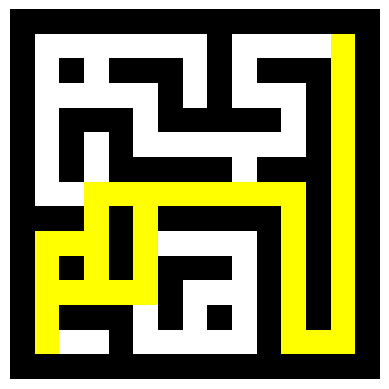

In [ ]:
def viz(arr, path=None):
    colors = {'#': 0, '.': 1, 'S': 2, 'E': 3}
    cmap = plt.cm.colors.ListedColormap(['black', 'white', 'green', 'red', 'yellow'])
    img = np.vectorize(colors.get)(arr)
    if path: 
        for r, c in path: img[r, c] = 4
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

viz(arr, best_paths_tiles)

Wrap the code above into solve2 function.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠

```python
def solve2(inp):
    arr = parse(inp)
    G = nx.DiGraph()
    G.add_weighted_edges_from(make_edges(arr))
    start = tuple(int(x) for x in np.argwhere(arr=='S')[0]) + ('E',)
    end_pos = tuple(int(x) for x in np.argwhere(arr=='E')[0])
    min_cost = min(nx.shortest_path_length(G, start, (*end_pos, d), weight='weight') for d in DIRS if (*end_pos, d) in G)
    all_paths = []
    for d in DIRS:
        if (*end_pos, d) not in G: continue
        if nx.shortest_path_length(G, start, (*end_pos, d), weight='weight') == min_cost:
            all_paths += list(nx.all_shortest_paths(G, start, (*end_pos, d), weight='weight'))
    return len(L(all_paths).concat().map(lambda x: (x[0], x[1])).unique())

solve2(samp)
```

In [ ]:
def solve2(inp):
    arr = parse(inp)
    G = nx.DiGraph()
    G.add_weighted_edges_from(make_edges(arr))
    start = tuple(int(x) for x in np.argwhere(arr=='S')[0]) + ('E',)
    end_pos = tuple(int(x) for x in np.argwhere(arr=='E')[0])
    min_cost = min(nx.shortest_path_length(G, start, (*end_pos, d), weight='weight') for d in DIRS)
    all_paths = []
    for d in DIRS:
        if nx.shortest_path_length(G, start, (*end_pos, d), weight='weight') == min_cost:
            all_paths += list(nx.all_shortest_paths(G, start, (*end_pos, d), weight='weight'))
    return len(L(all_paths).concat().map(lambda x: (x[0], x[1])).unique())

solve2(samp)

45

In [ ]:
solve2(samp2)

64

In [ ]:
solve2(inp)

504